In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from scipy.stats import randint as sp_randint, pearsonr, spearmanr, shapiro
import xgboost as xgb
import difflib
from xgboost import XGBClassifier
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
import graphviz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('E:/files/semester 3/Machine Learning/UAS/Dataset A/3A.tsv',sep='\t')
df.head(20)

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,-706.0,NaN,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,-92.0,NaN,NaN
5,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,-397.0,NaN,NaN
6,6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,-273.0,NaN,NaN


In [3]:
df.shape

(16928, 17)

In [4]:
for col in df.columns:
  print(f"Null in {col}: {df[col].isnull().sum()}")

Null in index: 0
Null in Name: 2
Null in Platform: 0
Null in Year_of_Release: 0
Null in Genre: 2
Null in Publisher: 55
Null in NA_Sales: 0
Null in EU_Sales: 0
Null in JP_Sales: 0
Null in Other_Sales: 0
Null in Global_Sales: 0
Null in Critic_Score: 8668
Null in Critic_Count: 8668
Null in User_Score: 6769
Null in User_Count: 0
Null in Developer: 6688
Null in Rating: 6836


In [5]:
df = df.drop_duplicates().reset_index(drop=True)
cat_cols = []
num_cols = []

for i in df.columns:
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        num_cols.append(i)
    else:
        cat_cols.append(i)

In [6]:
print(cat_cols)
print(num_cols)

['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer', 'Rating']
['index', 'Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count']


In [7]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
num_cols.append('User_Score')
cat_cols.remove('User_Score')

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


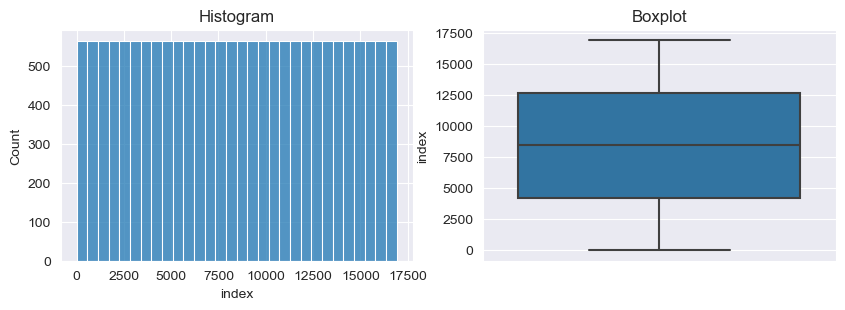

Skewness: 0.0
Kurtosis: -1.2


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


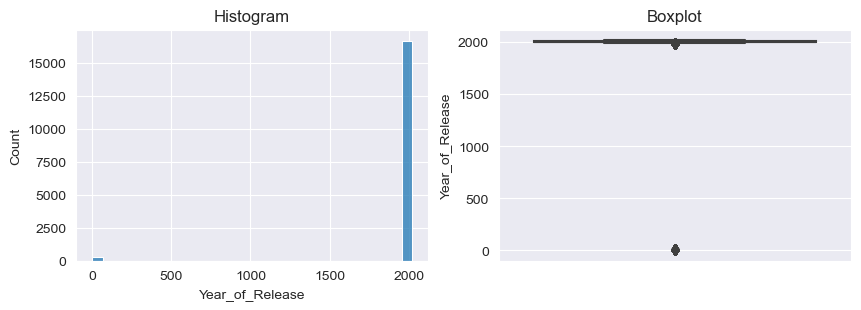

Skewness: -7.67702846117491
Kurtosis: 56.977161205357206


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


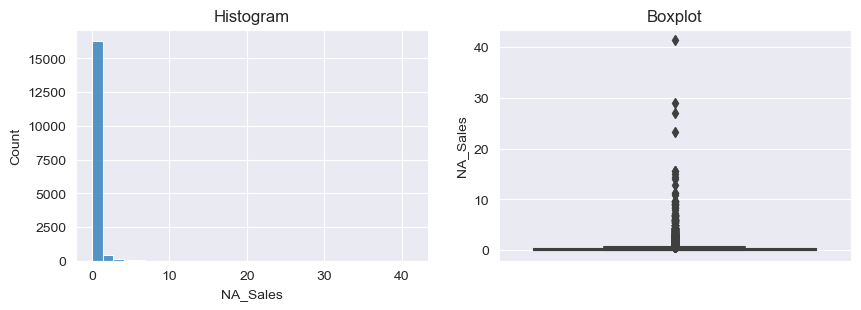

Skewness: 18.531847914202704
Kurtosis: 638.0492271302879


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


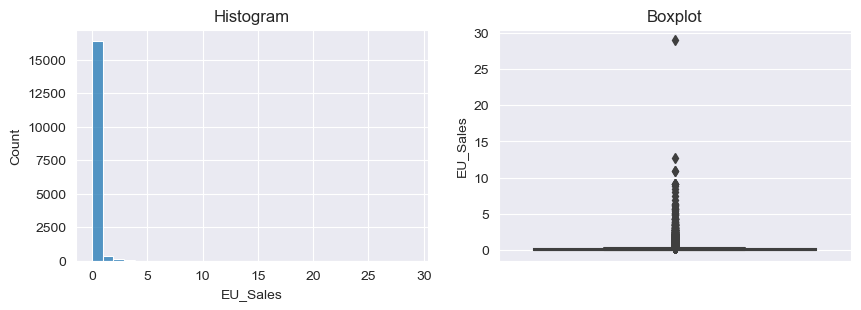

Skewness: 18.546629941510762
Kurtosis: 738.7388153331107


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


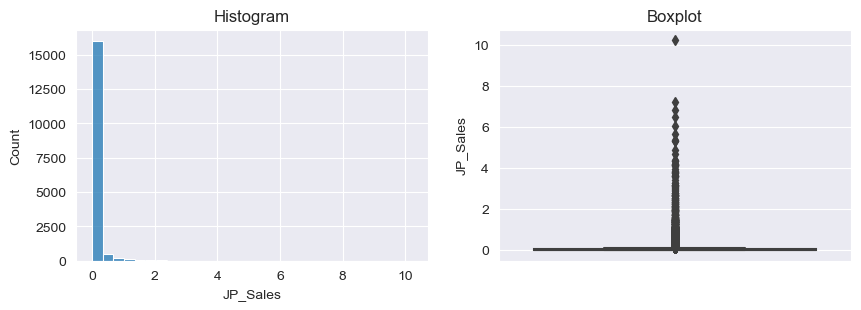

Skewness: 11.117582905705435
Kurtosis: 192.18696226343476


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


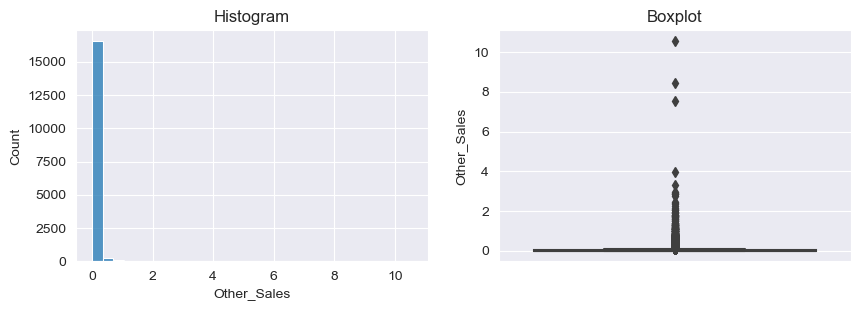

Skewness: 24.339496019105848
Kurtosis: 1042.8170488249298


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


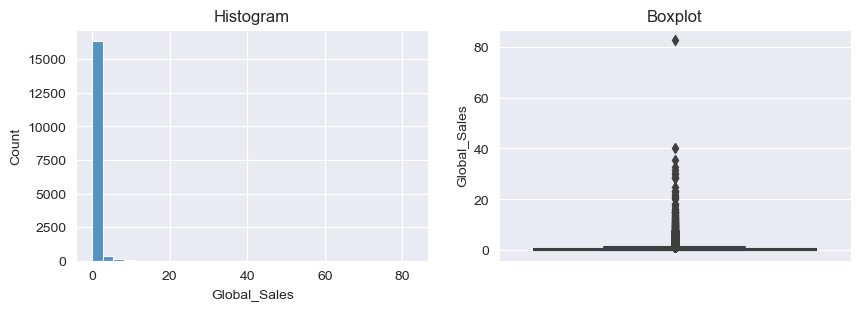

Skewness: 17.130208166202742
Kurtosis: 592.5802416769268


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


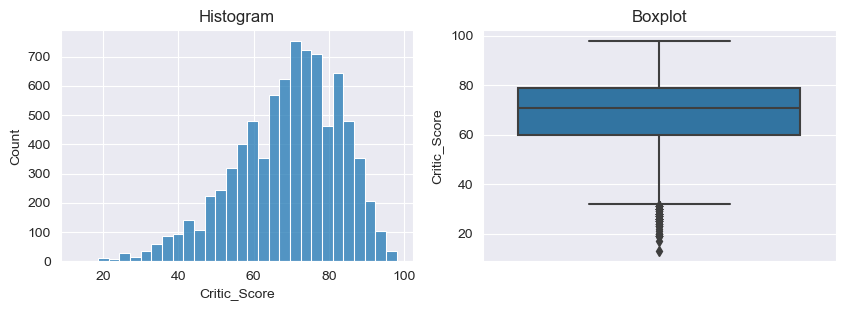

Skewness: -0.6141110228937384
Kurtosis: 0.1393670617448728


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


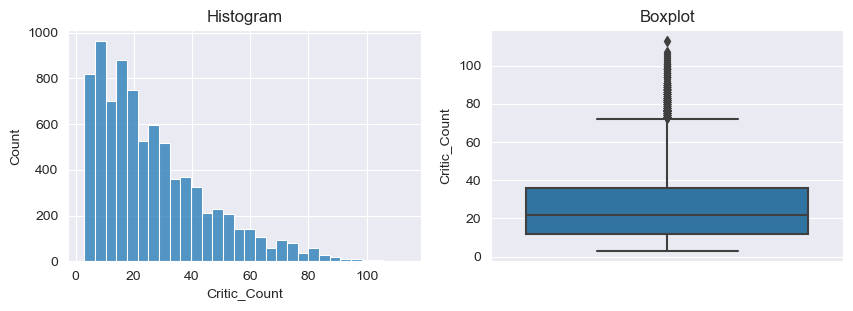

Skewness: 1.149353267105167
Kurtosis: 1.0146351689942432


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


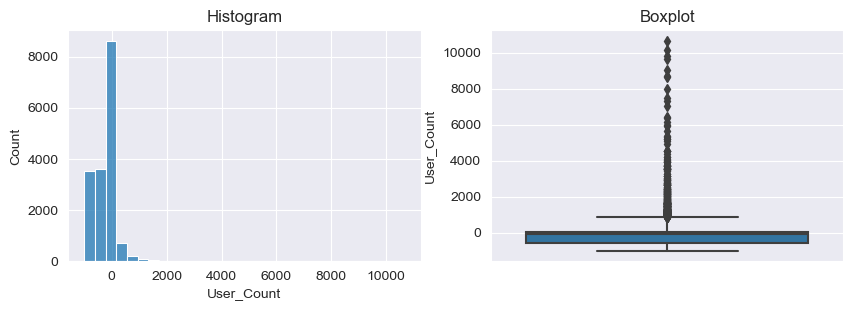

Skewness: 5.222681149412475
Kurtosis: 69.0481242297435


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


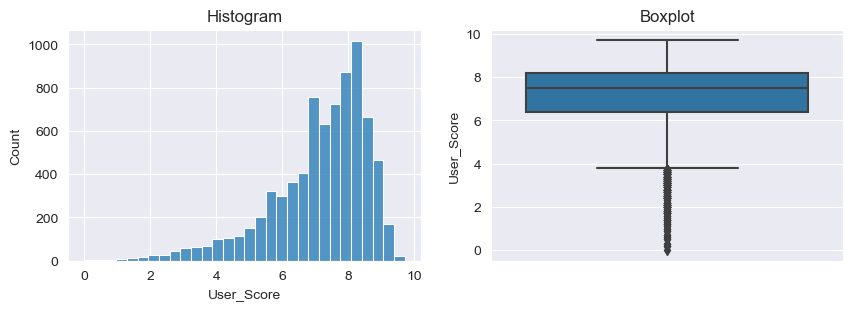

Skewness: -1.2494858790861902
Kurtosis: 1.7074810344972442


In [8]:
def check_distribution_outliers(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[col].skew())
        print('Kurtosis:', df[col].kurt())

check_distribution_outliers(df[num_cols], num_cols)

In [9]:
#casting
df['User_Score'] = df['User_Score'].replace({'tbd': None, 'invalid': None})
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df['User_Score'].fillna(df['User_Score'].median(), inplace=True)

In [10]:
df.loc[df['Critic_Score'].isna(),'Critic_Score'] = df['Critic_Score'].dropna().median()
df.loc[df['Critic_Count'].isna(),'Critic_Count'] = df['Critic_Count'].dropna().median()

In [11]:
for col in cat_cols:
    df.loc[df[col].isna(), col] = df[col].mode()[0]

In [12]:
for col in df.columns:
  print(f"Null in {col}: {df[col].isnull().sum()}")

Null in index: 0
Null in Name: 0
Null in Platform: 0
Null in Year_of_Release: 0
Null in Genre: 0
Null in Publisher: 0
Null in NA_Sales: 0
Null in EU_Sales: 0
Null in JP_Sales: 0
Null in Other_Sales: 0
Null in Global_Sales: 0
Null in Critic_Score: 0
Null in Critic_Count: 0
Null in User_Score: 0
Null in User_Count: 0
Null in Developer: 0
Null in Rating: 0


In [13]:
for i in cat_cols:
    print(df[i].value_counts(),'\n')

Name
Need for Speed: Most Wanted                14
Madden NFL 07                              10
Ratatouille                                 9
LEGO Marvel Super Heroes                    9
LEGO Star Wars II: The Original Trilogy     9
                                           ..
NBA ShootOut 2003                           1
Saint Seiya: Sanctuary Battle               1
Deca Sports 3                               1
Valhalla Knights 2                          1
Haitaka no Psychedelica                     1
Name: count, Length: 11562, dtype: int64 

Platform
PS2     2188
DS      2164
PS3     1359
Wii     1337
X360    1280
PSP     1216
PS      1214
PC       982
GBA      839
XB       832
GC       564
3DS      530
PSV      436
PS4      399
N64      325
XOne     253
SNES     242
SAT      175
WiiU     148
2600     136
GB        99
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64 

Genre


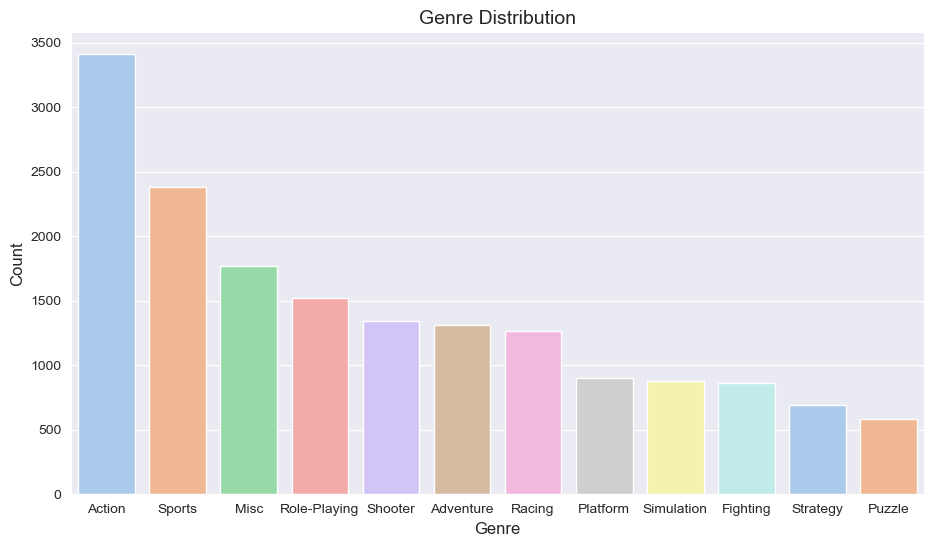

In [14]:
plt.figure(figsize = (11,6))
gen_counts = df['Genre'].value_counts()
sns.barplot(x=gen_counts.index, y=gen_counts.values, palette="pastel")
plt.title("Genre Distribution", fontsize=14)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [15]:
combined_features = df['Name'] + ' ' + df['Platform'] + ' ' + df['Genre'] + ' ' + df['Developer'] + ' ' + df['Rating']
combined_features

0                         Wii Sports Wii Sports Nintendo E
1                 Super Mario Bros. NES Platform Ubisoft E
2                     Mario Kart Wii Wii Racing Nintendo E
3                  Wii Sports Resort Wii Sports Nintendo E
4        Pokemon Red/Pokemon Blue GB Role-Playing Ubiso...
                               ...                        
16923    Aliens: Colonial Marines PS3 Shooter Gearbox S...
16924    Backyard Wrestling: Don't Try This at Home PS2...
16925    Yakuza: Dead Souls PS3 Shooter Ryu ga Gotoku S...
16926          Fight Night Round 2 XB Fighting EA Sports T
16927    MonHun Nikki: Poka Poka Ailu Mura PSP Role-Pla...
Length: 16928, dtype: object

In [16]:
# converting the text data to feature vectors
vectorizer = TfidfVectorizer()

feature_vectors = vectorizer.fit_transform(combined_features)
print(feature_vectors)

  (0, 6030)	0.5572781019611195
  (0, 8222)	0.5323485690847987
  (0, 9542)	0.6372174809811637
  (1, 9126)	0.14331967356863182
  (1, 6626)	0.30251125090567804
  (1, 5957)	0.46270804120836556
  (1, 1198)	0.5598520015546821
  (1, 5338)	0.45937429825741805
  (1, 8434)	0.3865083094844163
  (2, 6936)	0.25831398216227536
  (2, 4565)	0.5412957412982888
  (2, 5338)	0.42956418761860676
  (2, 6030)	0.44442058632284875
  (2, 9542)	0.5081709931113989
  (3, 7143)	0.5936952418443588
  (3, 6030)	0.44843610330147154
  (3, 8222)	0.4283755580533412
  (3, 9542)	0.5127625204026213
  (4, 6640)	0.1855721022791327
  (4, 7293)	0.1855363147736135
  (4, 3250)	0.3336511213476061
  (4, 1044)	0.32748435224902805
  (4, 7066)	0.32464466969940264
  (4, 6670)	0.7726042191059392
  (4, 9126)	0.1012855274307096
  :	:
  (16925, 3437)	0.4152082183015218
  (16925, 3156)	0.36971204132722474
  (16925, 7398)	0.4275737227629538
  (16925, 9708)	0.4023221543611673
  (16925, 8151)	0.3815320654498198
  (16925, 2063)	0.304200422002715

In [17]:
similarity = cosine_similarity(feature_vectors, feature_vectors)

In [18]:
print(similarity)


[[1.         0.         0.5714813  ... 0.         0.10982711 0.        ]
 [0.         1.         0.19733075 ... 0.         0.         0.01006748]
 [0.5714813  0.19733075 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.10982711 0.         0.         ... 0.         1.         0.        ]
 [0.         0.01006748 0.         ... 0.         0.         1.        ]]


In [19]:
list_of_all_titles = df['Name'].tolist()
print(list_of_all_titles)

['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', 'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris', 'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii', 'Duck Hunt', 'Nintendogs', 'Mario Kart DS', 'Pokemon Gold/Pokemon Silver', 'Wii Fit', 'Kinect Adventures!', 'Wii Fit Plus', 'Grand Theft Auto V', 'Grand Theft Auto: San Andreas', 'Super Mario World', 'Brain Age: Train Your Brain in Minutes a Day', 'Pokemon Diamond/Pokemon Pearl', 'Super Mario Land', 'Super Mario Bros. 3', 'Grand Theft Auto V', 'Grand Theft Auto: Vice City', 'Pokemon Ruby/Pokemon Sapphire', 'Brain Age 2: More Training in Minutes a Day', 'Pokemon Black/Pokemon White', 'Gran Turismo 3: A-Spec', 'Call of Duty: Modern Warfare 3', 'Pokémon Yellow: Special Pikachu Edition', 'Call of Duty: Black Ops 3', 'Call of Duty: Black Ops', 'Pokemon X/Pokemon Y', 'Call of Duty: Black Ops II', 'Call of Duty: Black Ops II', 'Call of Duty: Modern Warfare 2', 'Call of Duty: Modern Warfare 3', 'Grand Theft Auto III',

In [20]:
game_name = input(' Enter your favourite game name : ')

list_of_all_titles = df['Name'].tolist()

find_close_match = difflib.get_close_matches(game_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_game = df[df.Name == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_game]))

sorted_similar_games = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Games suggested for you : \n')

i = 1

for games in sorted_similar_games:
    index = games[0]
    title_from_index = df[df.index==index]['Name'].values[0]
    if (i < 6):
        print(i, '.',title_from_index)
        i+=1

 Enter your favourite game name :  Uncharted: The Nathan Drake Collection


Games suggested for you : 

1 . Uncharted: The Nathan Drake Collection
2 . Uncharted 3: Drake's Deception
3 . God of War Collection
4 . Uncharted: Drake's Fortune
5 . ICO


In [21]:
game_name = input(' Enter your favourite game name : ')

list_of_all_titles = df['Name'].tolist()

find_close_match = difflib.get_close_matches(game_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_game = df[df.Name == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_game]))

sorted_similar_games = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Games suggested for you : \n')

i = 1

for games in sorted_similar_games:
    index = games[0]
    title_from_index = df[df.index==index]['Name'].values[0]
    if (i < 6):
        print(i, '.',title_from_index)
        i+=1

 Enter your favourite game name :  Super Mario Bros.


Games suggested for you : 

1 . Super Mario Bros.
2 . Super Mario Bros. 3
3 . Super Mario Bros. 2
4 . Mario Bros.
5 . Super Mario Bros. 3


In [22]:
game_name = input(' Enter your favourite game name : ')

list_of_all_titles = df['Name'].tolist()

find_close_match = difflib.get_close_matches(game_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_game = df[df.Name == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_game]))

sorted_similar_games = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Games suggested for you : \n')

i = 1

for games in sorted_similar_games:
    index = games[0]
    title_from_index = df[df.index==index]['Name'].values[0]
    if (i < 6):
        print(i, '.',title_from_index)
        i+=1

 Enter your favourite game name :  Jak II


Games suggested for you : 

1 . Jak II
2 . Jak 3
3 . Jak X: Combat Racing
4 . Jak and Daxter: The Precursor Legacy
5 . The Last of Us
